Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Load dataset

In [2]:
df = pd.read_csv('/Users/kacheampong/Downloads/Employee_Attrition_Data.csv')

In [3]:
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee ID            10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Job Role               10000 non-null  object 
 4   Department             10000 non-null  object 
 5   Monthly Income         10000 non-null  int64  
 6   Years at Company       10000 non-null  int64  
 7   Number of Promotions   10000 non-null  int64  
 8   Last Raise Percentage  10000 non-null  float64
 9   Distance from Office   10000 non-null  float64
 10  Job Satisfaction       10000 non-null  int64  
 11  Performance Rating     10000 non-null  int64  
 12  Attrition              10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


In [5]:
df.describe()

,Employee ID,Age,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,40.561200,8948.750300,14.311100,1.958300,10.022797,26.632481,5.407000,2.992900
std,2886.89568,10.876483,3473.354793,8.742572,1.426171,5.823696,14.396393,2.943504,1.410833
min,1.00000,22.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,5895.000000,7.000000,1.000000,5.101189,14.509275,3.000000,2.000000
50%,5000.50000,41.000000,8982.500000,14.000000,2.000000,9.990978,27.122930,5.000000,3.000000
75%,7500.25000,50.000000,11928.250000,22.000000,3.000000,15.042273,39.148606,8.000000,4.000000
max,10000.00000,59.000000,14999.000000,30.000000,5.000000,20.000000,50.000000,10.000000,5.000000


In [6]:
df['Attrition'].value_counts()

Attrition
No     8597
Yes    1403
Name: count, dtype: int64

# Exploratory Data Analysis

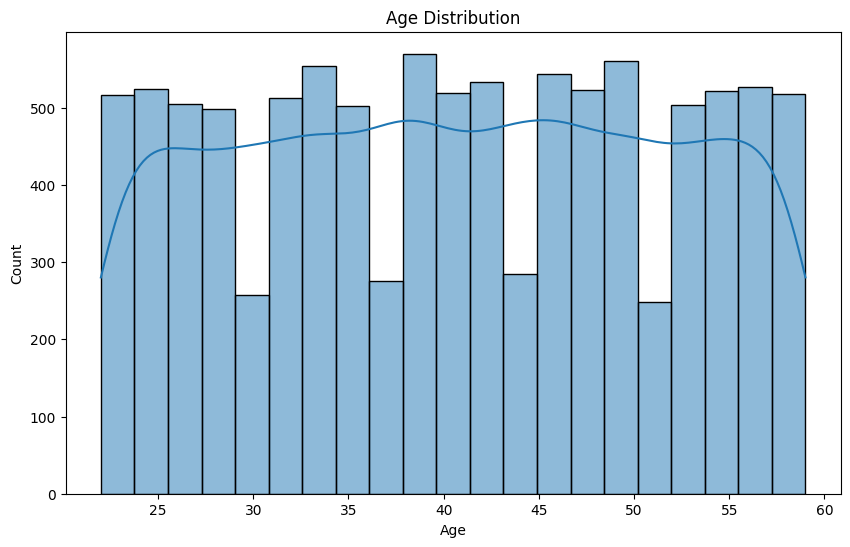

In [7]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

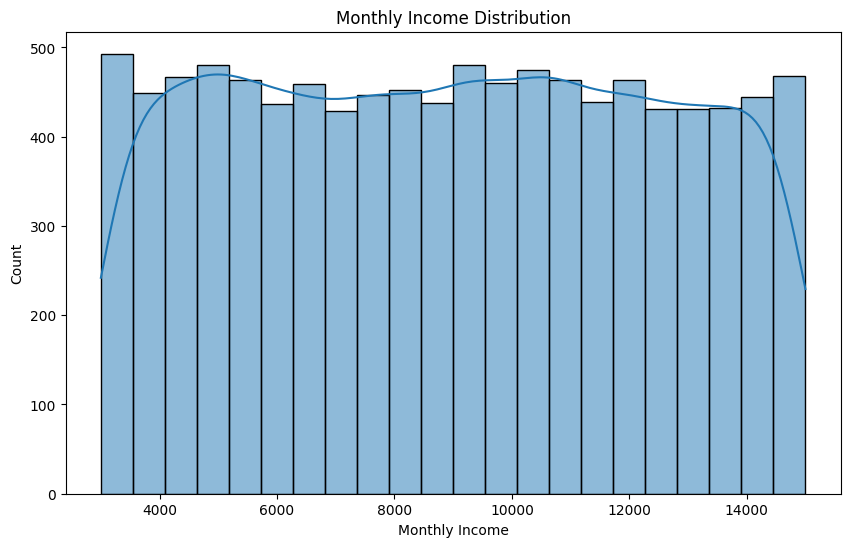

In [8]:
# Monthly Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly Income'], kde=True)
plt.title('Monthly Income Distribution')
plt.show()

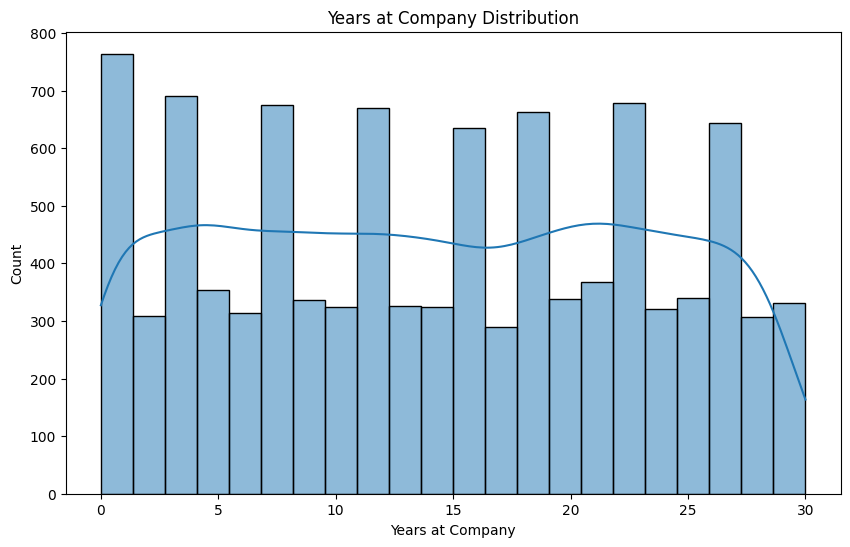

In [9]:
# Years at Company Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Years at Company'], kde=True)
plt.title('Years at Company Distribution')
plt.show()

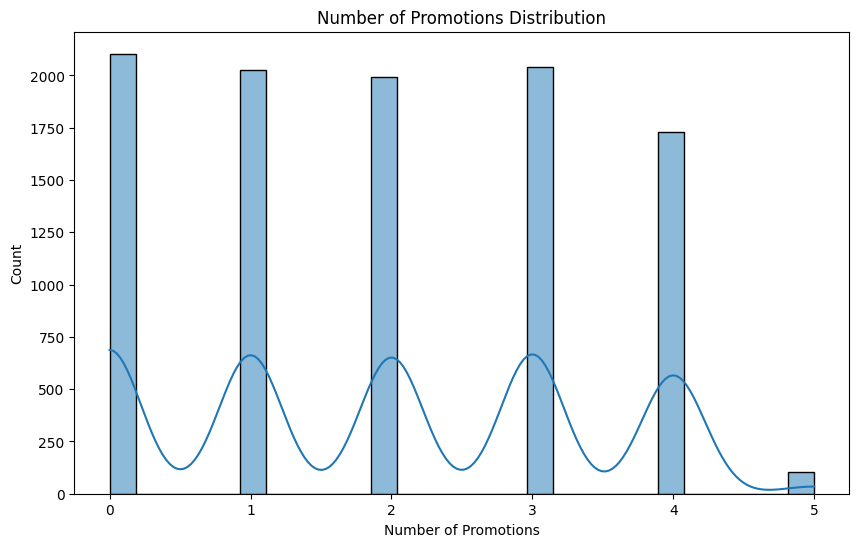

In [10]:
# Number of Promotions Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Promotions'], kde=True)
plt.title('Number of Promotions Distribution')
plt.show()

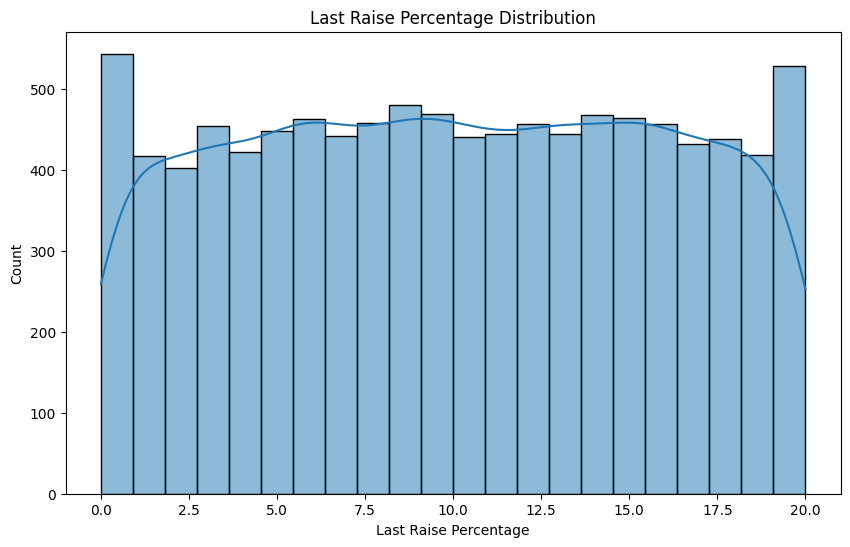

In [11]:
# Last Raise Percentage Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Last Raise Percentage'], kde=True)
plt.title('Last Raise Percentage Distribution')
plt.show()

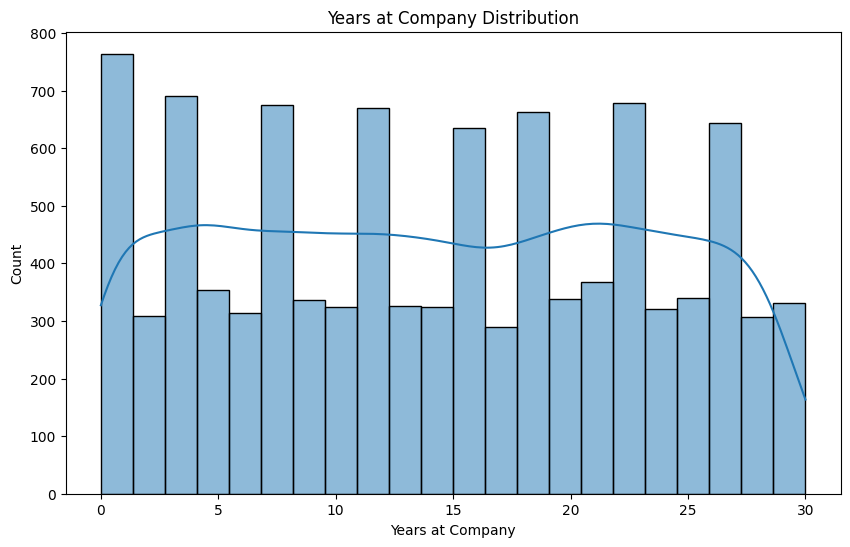

In [12]:
# Years at Company Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Years at Company'], kde=True)
plt.title('Years at Company Distribution')
plt.show()

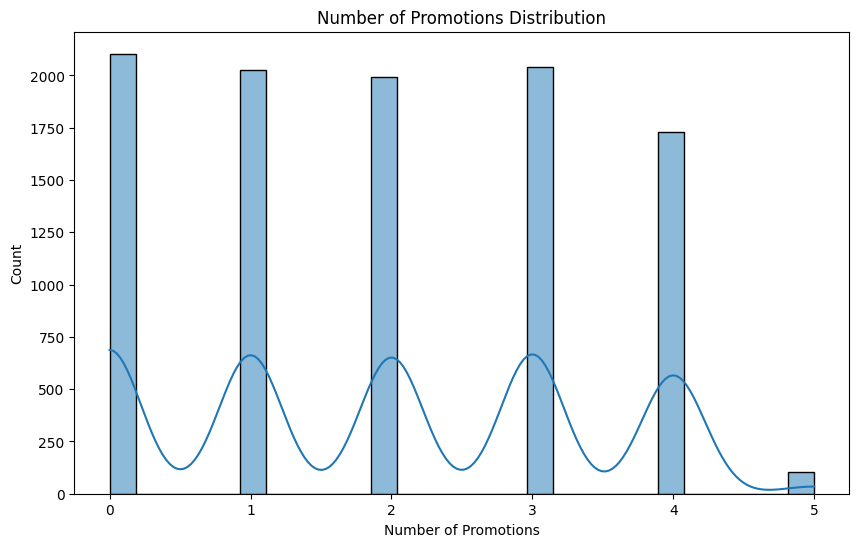

In [13]:
# Number of Promotions Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Promotions'], kde=True)
plt.title('Number of Promotions Distribution')
plt.show()

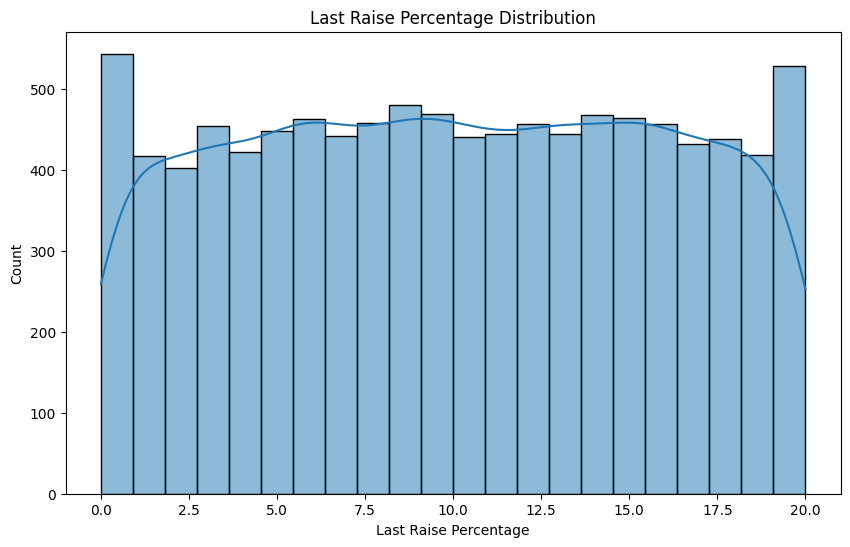

In [14]:
# Last Raise Percentage Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Last Raise Percentage'], kde=True)
plt.title('Last Raise Percentage Distribution')
plt.show()

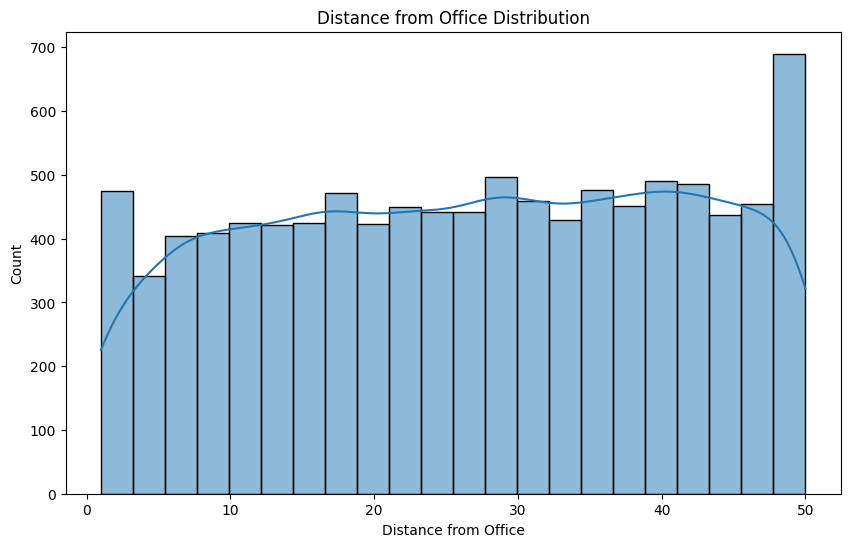

In [15]:
# Distance from Office Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance from Office'], kde=True)
plt.title('Distance from Office Distribution')
plt.show()

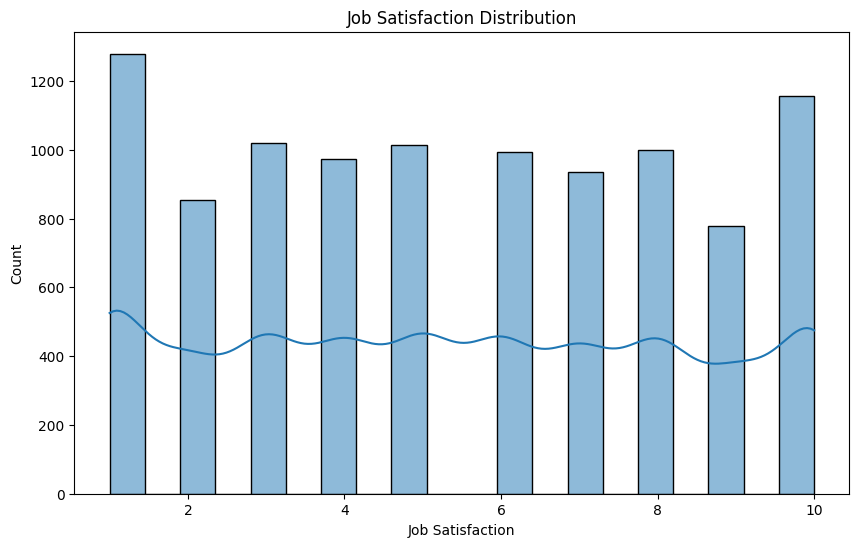

In [16]:
# Job Satisfaction Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Job Satisfaction'], kde=True)
plt.title('Job Satisfaction Distribution')
plt.show()

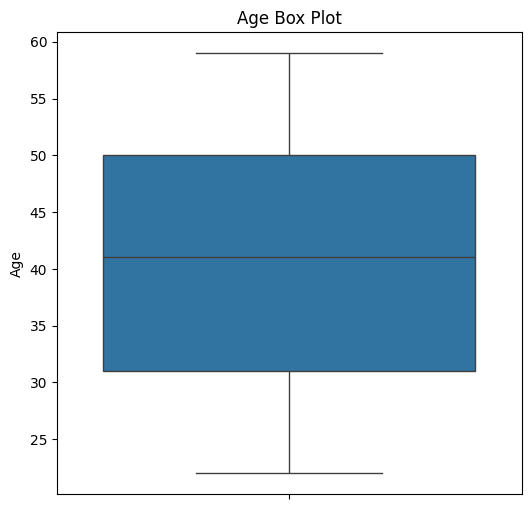

In [17]:
# Age Box Plot
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['Age'])
plt.title('Age Box Plot')
plt.show()

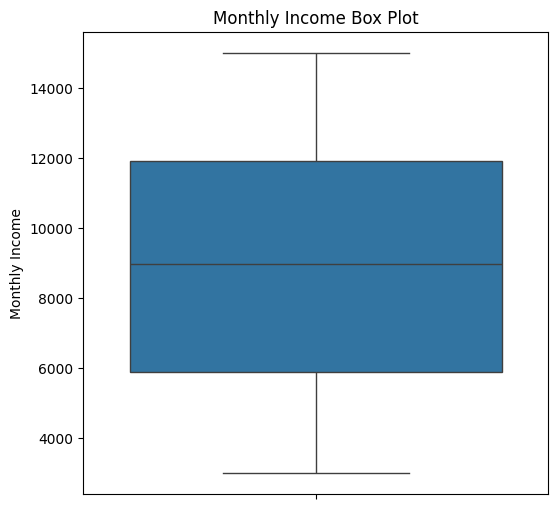

In [18]:
# Monthly Income Box Plot
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['Monthly Income'])
plt.title('Monthly Income Box Plot')
plt.show()

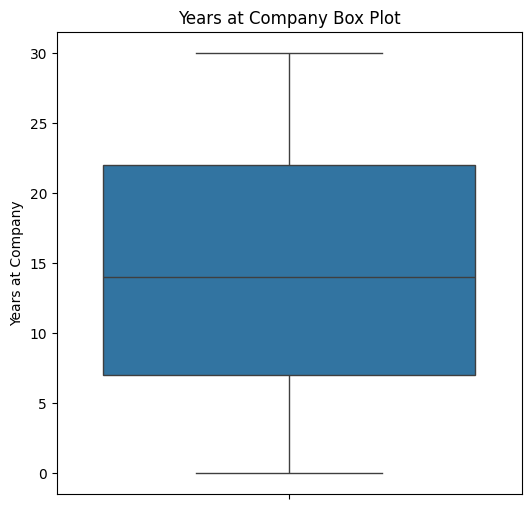

In [19]:
# Years at Company Box Plot
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['Years at Company'])
plt.title('Years at Company Box Plot')
plt.show()

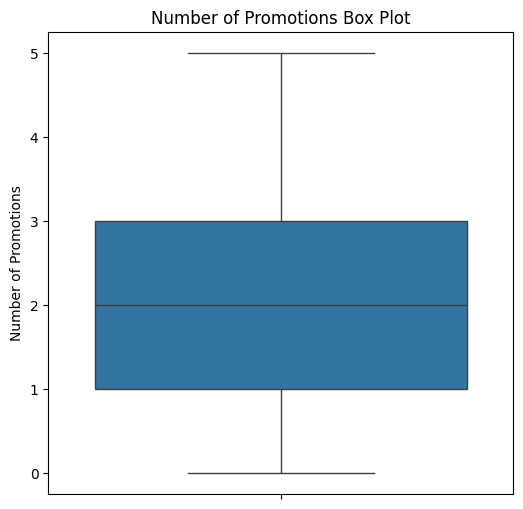

In [20]:
# Number of Promotions Box Plot
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['Number of Promotions'])
plt.title('Number of Promotions Box Plot')
plt.show()

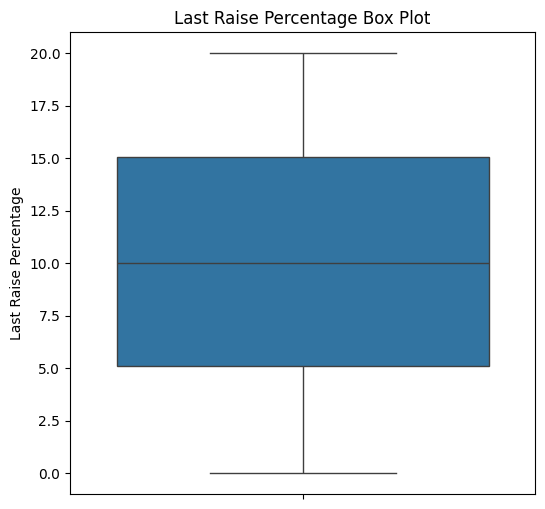

In [21]:
# Last Raise Percentage Box Plot
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['Last Raise Percentage'])
plt.title('Last Raise Percentage Box Plot')
plt.show()

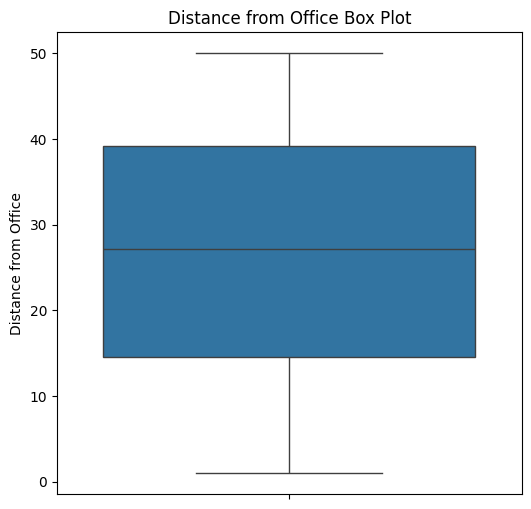

In [22]:
# Distance from Office Box Plot
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['Distance from Office'])
plt.title('Distance from Office Box Plot')
plt.show()

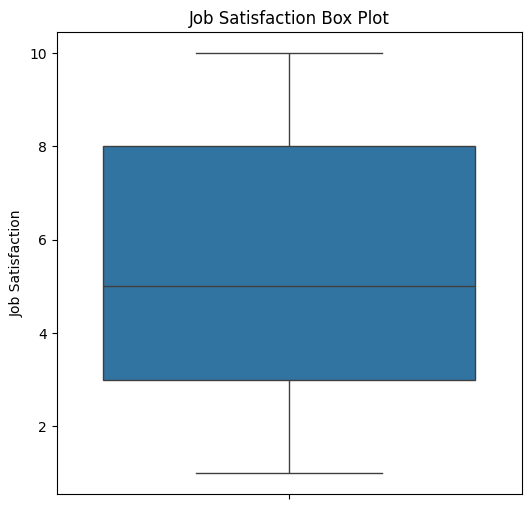

In [23]:
# Job Satisfaction Box Plot
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['Job Satisfaction'])
plt.title('Job Satisfaction Box Plot')
plt.show()

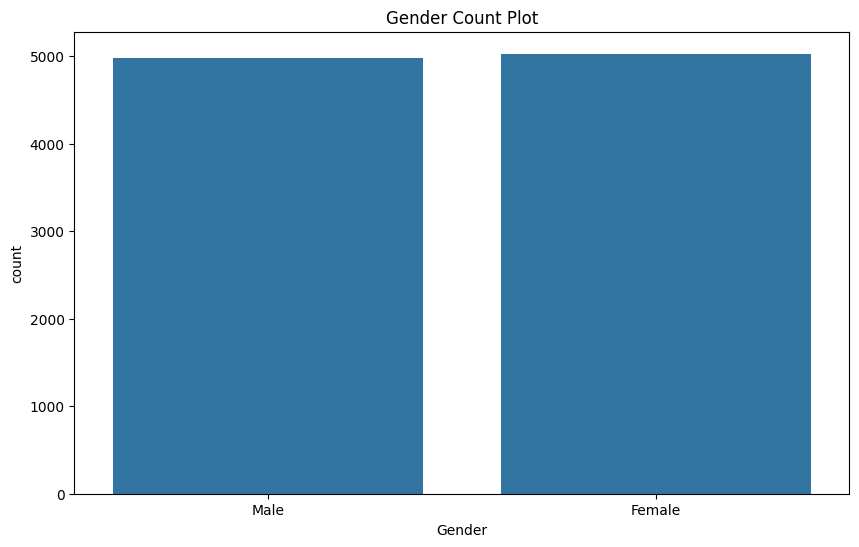

In [24]:
# Gender Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Gender'])
plt.title('Gender Count Plot')
plt.show()

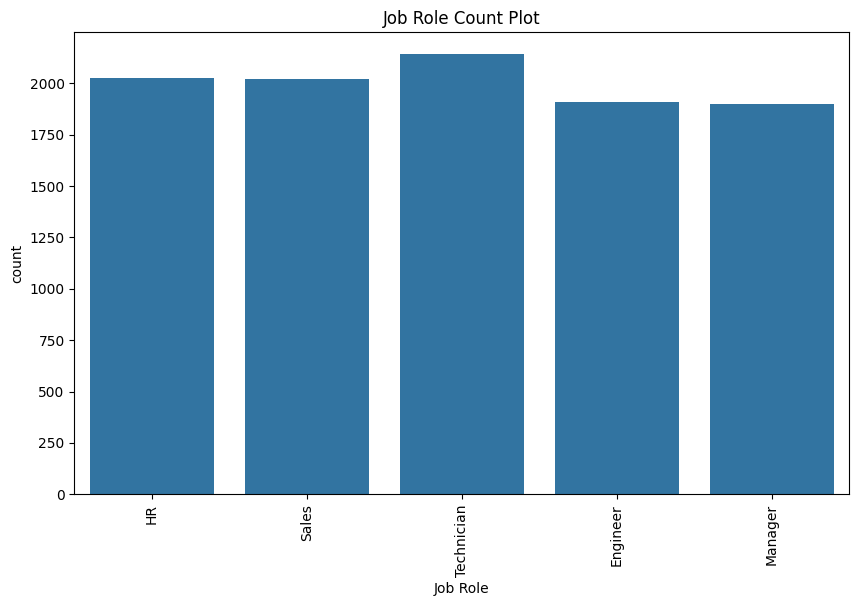

In [25]:
# Job Role Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Job Role'])
plt.title('Job Role Count Plot')
plt.xticks(rotation=90)
plt.show()

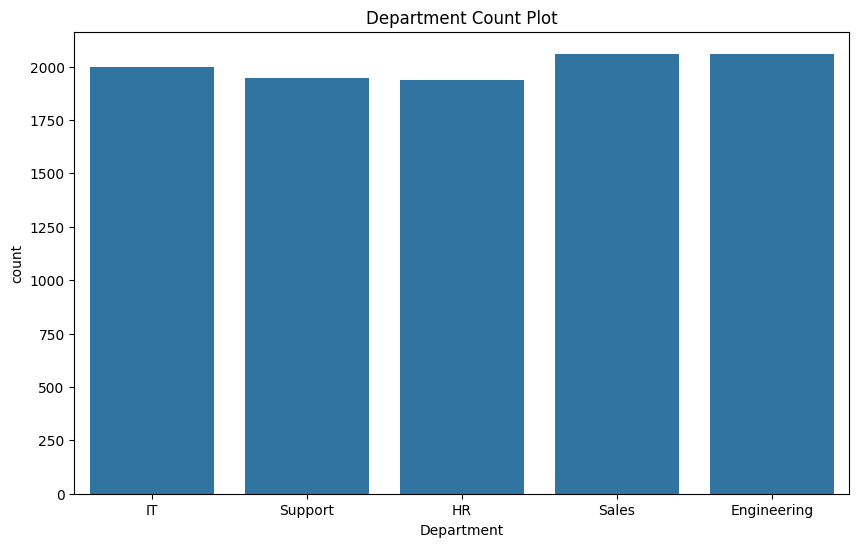

In [26]:
# Department Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Department'])
plt.title('Department Count Plot')
plt.show()

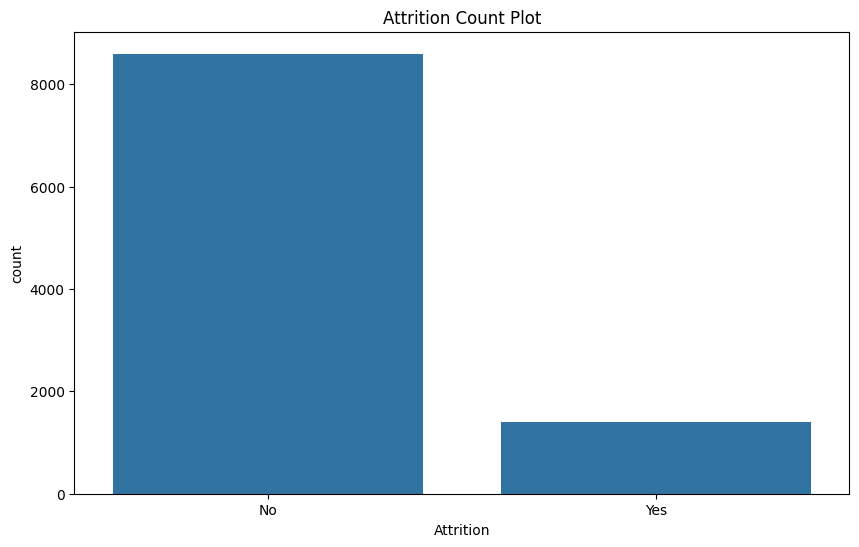

In [27]:
# Attrition Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Attrition'])
plt.title('Attrition Count Plot')
plt.show()

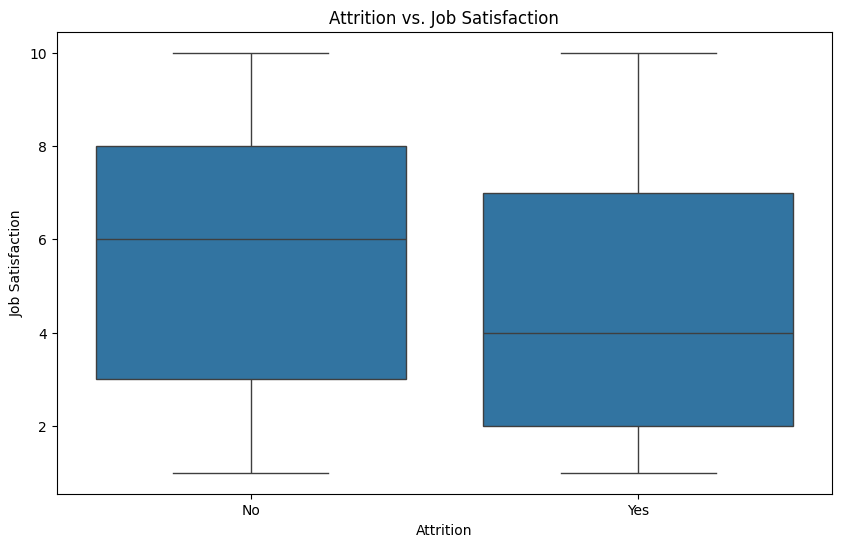

In [28]:
# Attrition vs. Job Satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Job Satisfaction', data=df)
plt.title('Attrition vs. Job Satisfaction')
plt.show()

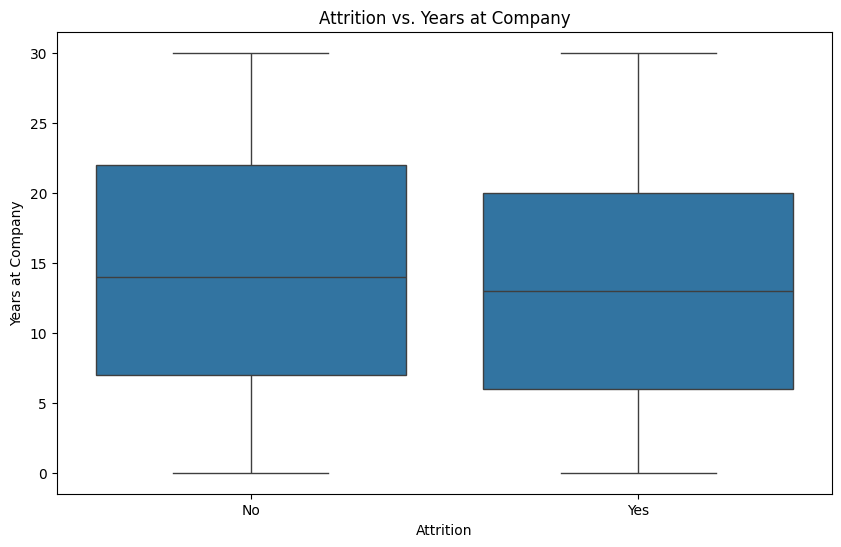

In [29]:
# Attrition vs. Years at Company
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Years at Company', data=df)
plt.title('Attrition vs. Years at Company')
plt.show()

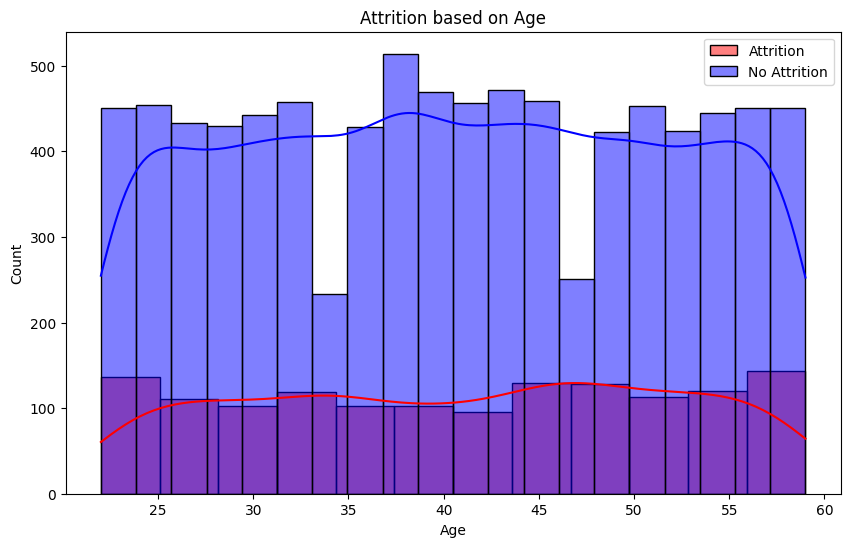

In [30]:
# Attrition based on Age
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Attrition'] == 'Yes']['Age'], kde=True, color='red', label='Attrition')
sns.histplot(df[df['Attrition'] == 'No']['Age'], kde=True, color='blue', label='No Attrition')
plt.title('Attrition based on Age')
plt.legend()
plt.show()

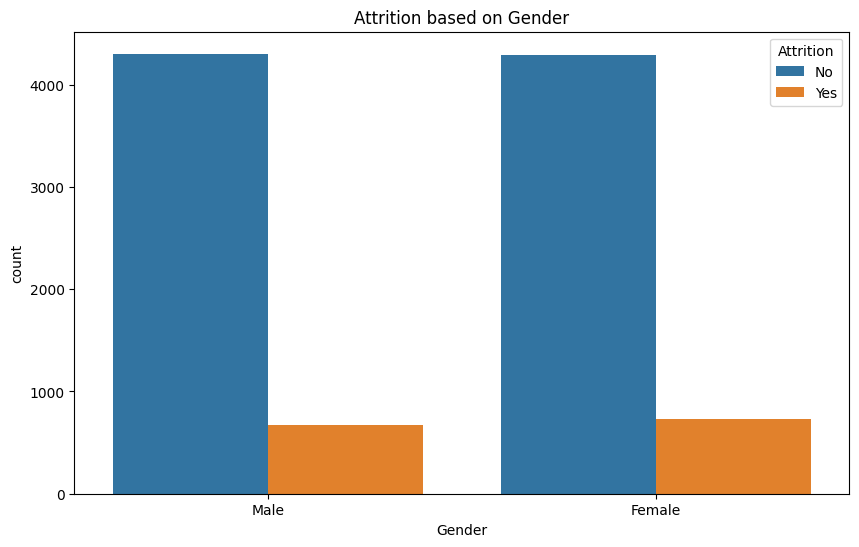

In [31]:
# Attrition based on Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Attrition based on Gender')
plt.show()

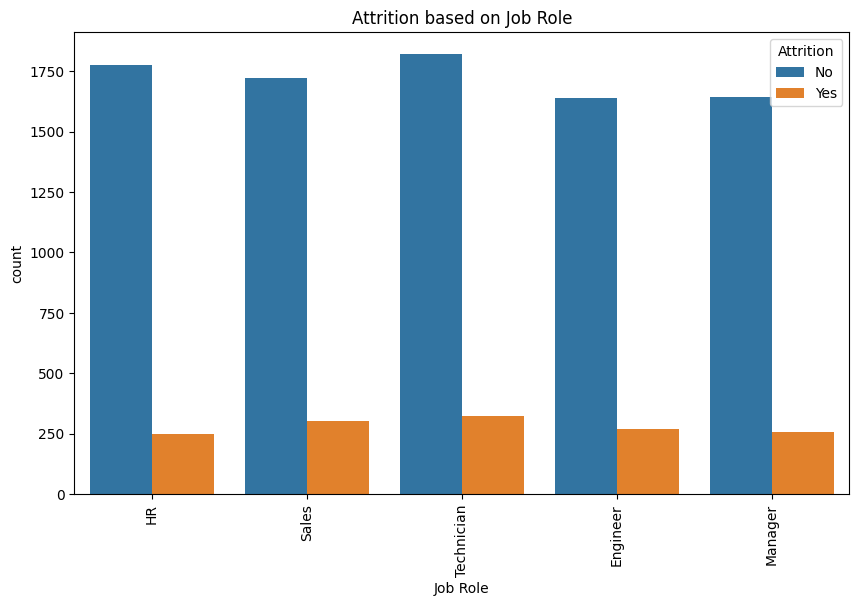

In [32]:
# Attrition based on Job Role
plt.figure(figsize=(10, 6))
sns.countplot(x='Job Role', hue='Attrition', data=df)
plt.title('Attrition based on Job Role')
plt.xticks(rotation=90)
plt.show()

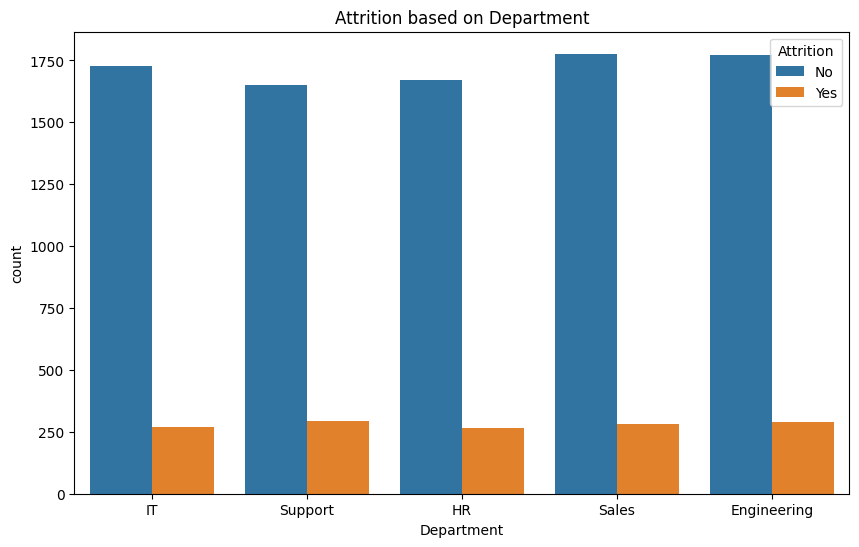

In [33]:
# Attrition based on Department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition based on Department')
plt.show()

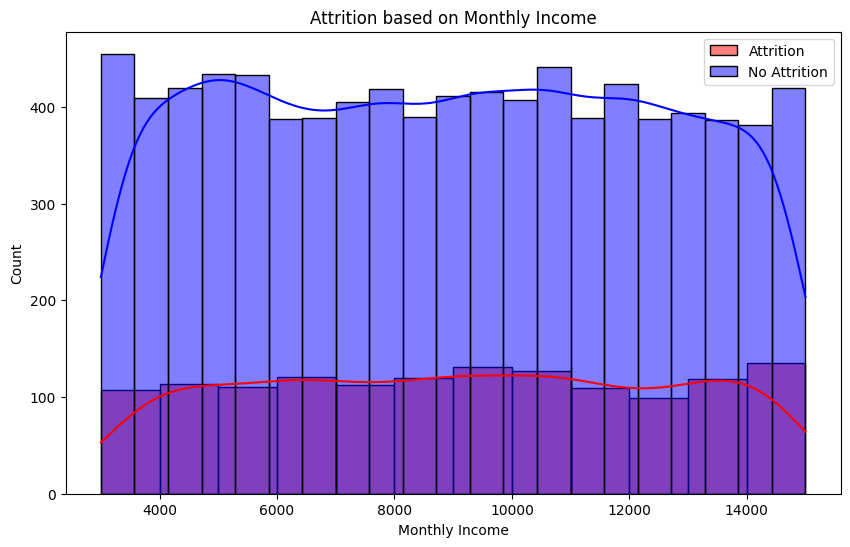

In [34]:
# Attrition based on Monthly Income
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Attrition'] == 'Yes']['Monthly Income'], kde=True, color='red', label='Attrition')
sns.histplot(df[df['Attrition'] == 'No']['Monthly Income'], kde=True, color='blue', label='No Attrition')
plt.title('Attrition based on Monthly Income')
plt.legend()
plt.show()

# Data Exploration Findings

We analyzed a dataset containing various employee attributes such as age, gender, job role, department, monthly income, years at the company, number of promotions, job satisfaction, performance rating, and whether they left the company (attrition).

**Key insights include**:

Employees with lower job satisfaction were more likely to leave the company.

Employees who had fewer promotions over their tenure had a higher attrition rate.

Lower monthly income was correlated with higher attrition rates.

**Initial Hypotheses**

1. Employees with lower job satisfaction are more likely to leave the company.

2. Employees with fewer promotions are more likely to leave the company.

3. Employees with lower monthly income are more likely to leave the company.

# Model Building

In [35]:
cat_columns = ['Gender', 'Job Role', 'Department', 'Attrition']
df = pd.get_dummies(df, columns=cat_columns, drop_first=True)

Define X and y

In [36]:
X = df.drop(columns=['Employee ID', 'Attrition_Yes'])
y = df['Attrition_Yes']

Split data into training and reserve 30% for testing

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Scale data

In [38]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit(X_train).transform(X_test)

In [39]:
pd.DataFrame(X_train_scaled, columns=X_train.columns).head()

,Age,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Gender_Male,Job Role_HR,Job Role_Manager,Job Role_Sales,Job Role_Technician,Department_HR,Department_IT,Department_Sales,Department_Support
0,0.108108,0.067183,0.966667,0.2,0.088944,0.628926,1.000000,0.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.351351,0.885305,0.333333,0.4,0.946179,0.389199,0.222222,0.25,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.270270,0.697924,0.066667,0.2,0.000000,0.000000,1.000000,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.756757,0.191881,1.000000,0.2,0.000000,0.285597,0.555556,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.351351,0.357256,0.133333,0.2,0.763062,0.077527,0.000000,1.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Initialize models

Want to look at Logistic Regression, Decision Trees and Random Forest models

In [40]:
logreg = LogisticRegression(class_weight='balanced', random_state=42)
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

Cross-validation scores

In [41]:
logreg_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
dt_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

In [42]:
print(np.mean(logreg_scores))
print(np.mean(dt_scores))
print(np.mean(rf_scores))

0.6244285714285714
0.7842857142857143
0.8615714285714284


Random Forest model performed best. Will tune model to see if it can improve.

Hyperparameter Tuning for Random Forest

In [43]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

Initialize Grid Search

In [44]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

Fit Grid Search

In [45]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [46]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Train final model with best parameters

In [47]:
final_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=30,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=42)
final_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

Evaluate the final model on the test set

In [48]:
y_pred = final_classifier.predict(X_test_scaled)

Classification Report

In [49]:
clf =classification_report(y_test, y_pred)
print(clf)

              precision    recall  f1-score   support

       False       0.86      0.99      0.92      2568
        True       0.43      0.05      0.08       432

    accuracy                           0.85      3000
   macro avg       0.65      0.52      0.50      3000
weighted avg       0.80      0.85      0.80      3000



Due to an imbalance in attrition yes to no, the model performs well in predicting non attrition cases than attrition, skewing performance.

I want to optimze for recall because it is more costly to incorrectly flag an employee who is not at risk of attrition (false positive), than it is to miss an actual employee at risk (false negative).

Prioritizing recall allows me to take proactive measure to retain employees who might otherwise leave, potentially reducing turnover rates and associated costs.

Therefore, I will lower decision threshold to increase recall.

Precision-Recall Curve

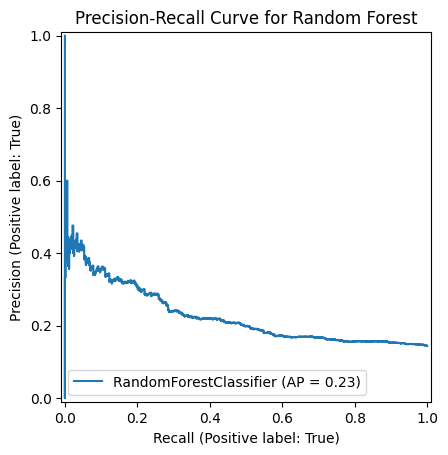

In [50]:
display = PrecisionRecallDisplay.from_estimator(final_classifier, X_test_scaled, y_test)
display.ax_.set_title("Precision-Recall Curve for Random Forest")
plt.show()

Predict Probabilities

In [52]:
rf_probs = final_classifier.predict_proba(X_test_scaled)[:, 1] 

In [53]:
rf_probs

array([0.09052579, 0.32537698, 0.21647222, ..., 0.1184623 , 0.22075992,
       0.10460714])

Use 20% threshold to optimize for recall

In [54]:
new_predictions = []
for prob in rf_probs:
    if prob >= 0.2:
        new_predictions.append(1)
    else:
        new_predictions.append(0)

Evaluation Metrics

In [55]:
accuracy = accuracy_score(y_test, new_predictions)
precision = precision_score(y_test, new_predictions)
recall = recall_score(y_test, new_predictions)
f1 = f1_score(y_test, new_predictions)

In [56]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.746
0.23039215686274508
0.3263888888888889
0.27011494252873564


Improved Recall

Confusion Matrix

In [57]:
conf_matrix = confusion_matrix(y_test, new_predictions)
print(conf_matrix)

[[2097  471]
 [ 291  141]]


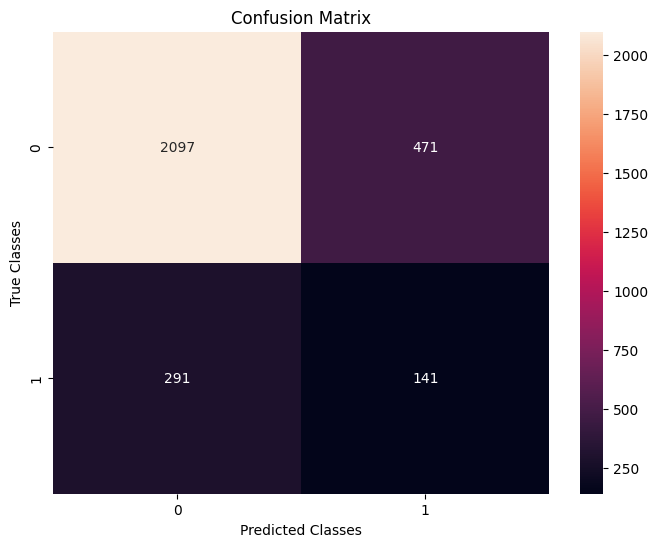

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')
plt.title('Confusion Matrix')
plt.show()

# Model Building Process


1. Data Preparation:

Categorical variables such as gender, job role, department, and attrition were encoded using one-hot encoding.

Numerical features were scaled using MinMaxScaler to ensure all features contributed equally to the model.


2. Model Selection:

We considered several models: Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting.

Cross-validation was used to evaluate each model’s performance on accuracy.


3. Model Evaluation:

The Random Forest model emerged as the best performer with high accuracy and robustness to overfitting.

Further fine-tuning of the Random Forest model’s hyperparameters was performed to optimize its performance.

# Final Model Selection and Performance

Selected Model:

Random Forest Classifier

Class Weight Adjustment: Balanced to handle class imbalance.

Threshold Adjustment: Used a threshold of 0.2 to optimize for higher recall.

# Initial Hypotheses:

Employees with lower job satisfaction are more likely to leave the company.

Employees with fewer promotions are more likely to leave the company.

Employees with lower monthly income are more likely to leave the company.



# Hypotheses Validation:

Our analysis confirmed that employees with lower job satisfaction, fewer promotions, and lower monthly income were indeed more likely to leave, validating our initial hypotheses.

# Business Application

Identifying At-Risk Employees: The model can be used to identify employees who are at risk of leaving the company. HR can focus retention efforts on these individuals.

Tailored Interventions: By analyzing the factors that contribute most to attrition (e.g., job satisfaction, promotions, income), targeted interventions can be developed.

Increase Job Satisfaction: Implement programs to improve job satisfaction, such as employee engagement initiatives, better work-life balance, and career development opportunities.

Promotion Pathways: Review promotion policies to ensure employees have clear, achievable career progression paths.

Competitive Compensation: Ensure that compensation is competitive and aligns with market standards.